In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


%matplotlib inline

In [2]:
dataset = pd.read_csv("dataset/cleaned_dataset.csv", sep='\t', encoding='latin-1')

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246236 entries, 0 to 246235
Data columns (total 44 columns):
labels                                     246236 non-null int64
allergens                                  246236 non-null int64
traces                                     246236 non-null int64
additives_n                                219508 non-null float64
ingredients_from_palm_oil_n                219508 non-null float64
ingredients_that_may_be_from_palm_oil_n    219508 non-null float64
nutrition_grade_fr                         208414 non-null object
pnns_groups_1                              66470 non-null object
pnns_groups_2                              68877 non-null object
energy_100g                                242186 non-null float64
fat_100g                                   225701 non-null float64
saturated-fat_100g                         214142 non-null float64
monounsaturated-fat_100g                   17828 non-null float64
polyunsaturated-fat_100g      

6161893
246236
44


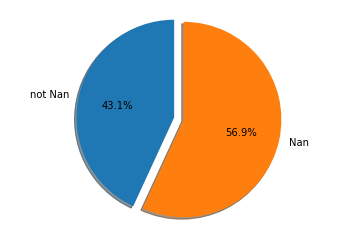

In [4]:
b = dataset.isnull().sum().sum()
print(b)
print(len(dataset))
print(len(list(dataset)))
a = len(dataset) * len(list(dataset))

labels = 'not Nan', 'Nan'
sizes = [a-b, b]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("nan_count2.png")
plt.show()

# Analyse Univariée

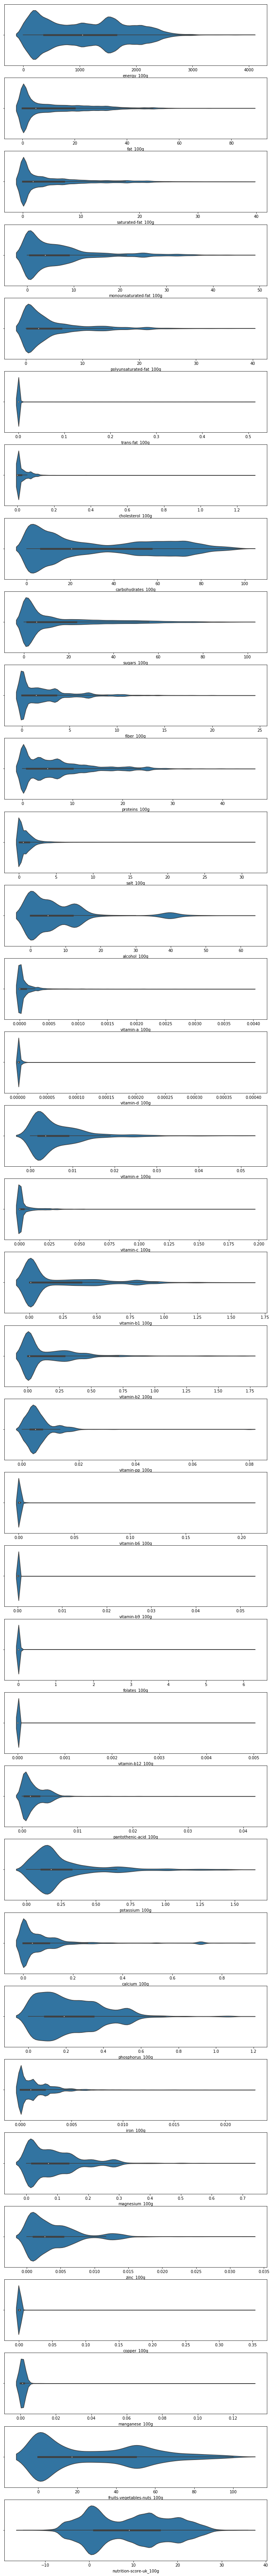

In [5]:
selected_features = [col for col in dataset if col.endswith("_100g")]

fig = plt.figure(figsize=(12,120))
for i, col in enumerate(selected_features):
    ax1 = fig.add_subplot(len(selected_features), 1, i+1)
    sns.violinplot(x=dataset[col], ax=ax1)
plt.savefig("violinplot.png")
plt.show()

In [6]:
dataset.min()

labels                                      0.0
allergens                                   0.0
traces                                      0.0
additives_n                                 0.0
ingredients_from_palm_oil_n                 0.0
ingredients_that_may_be_from_palm_oil_n     0.0
energy_100g                                 0.0
fat_100g                                    0.0
saturated-fat_100g                          0.0
monounsaturated-fat_100g                    0.0
polyunsaturated-fat_100g                    0.0
trans-fat_100g                              0.0
cholesterol_100g                            0.0
carbohydrates_100g                          0.0
sugars_100g                                 0.0
fiber_100g                                  0.0
proteins_100g                               0.0
salt_100g                                   0.0
alcohol_100g                                0.0
vitamin-a_100g                              0.0
vitamin-d_100g                          

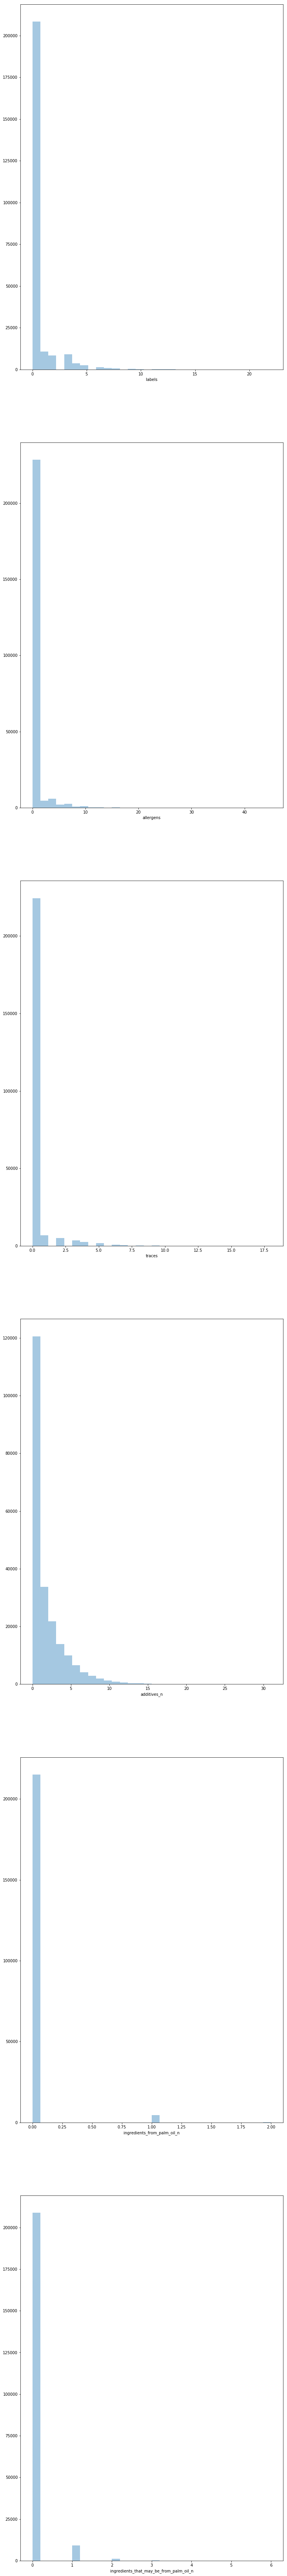

In [7]:
selected_features = ["labels", "allergens", "traces", "additives_n", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]

fig = plt.figure(figsize=(12,120))
for i, col in enumerate(selected_features):
    ax1 = fig.add_subplot(len(selected_features), 1, i+1)
    sns.distplot(dataset[col].dropna(), kde=False, ax=ax1, bins=30)  # kde=False, rug=True
plt.savefig("hist_cat.png")
plt.show()

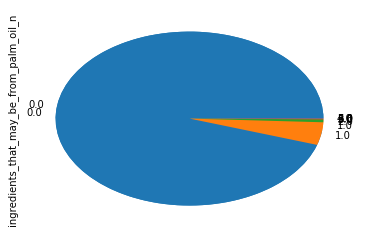

In [8]:
labels = ["ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]
# plt.pie(dataset["ingredients_from_palm_oil_n"])
# plt.show()

# for label in labels:
#     dataset[label].plot.pie()
#     dataset.plot(kind='pie', y=label)
#     plt.savefig(label)
#     plt.show()
#     print(dataset[label].value_counts())
#     print(label)

# dataset["ingredients_from_palm_oil_n"].plot(kind='pie')
# plt.show()

for label in labels:
    a = dataset[label].value_counts()
    a.plot(kind='pie')
    plt.savefig("{}.png".format(label))

# Analyse Multivariée

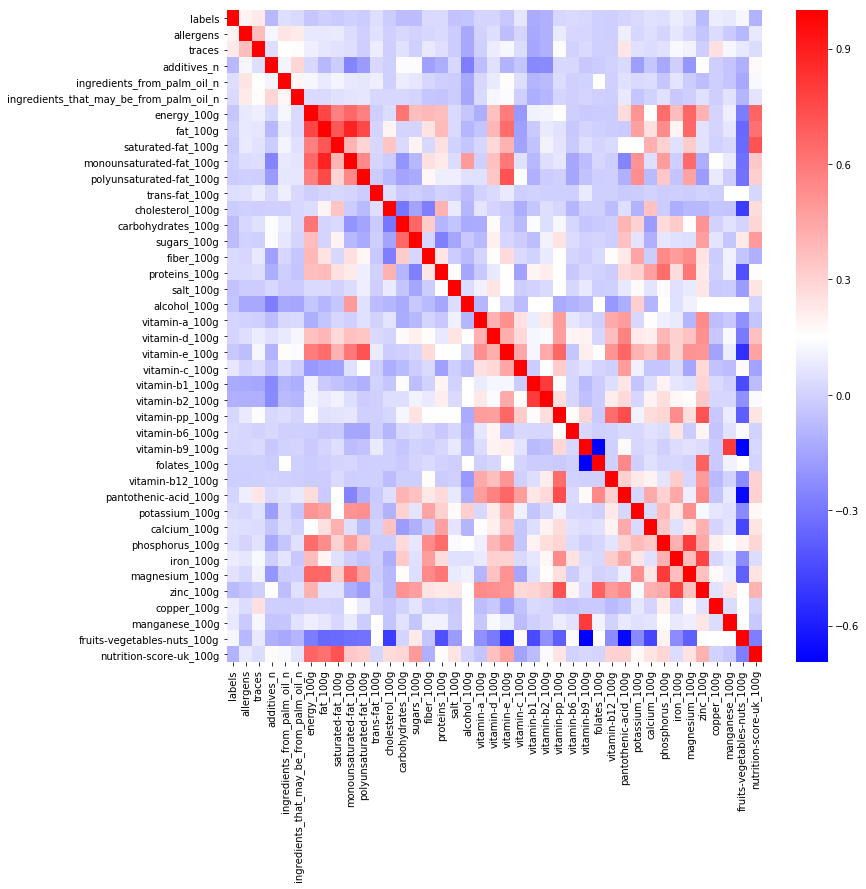

In [9]:
plt.figure(figsize=(12,12))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, cmap="bwr")
plt.savefig("correlation_matrix.png")
plt.show()

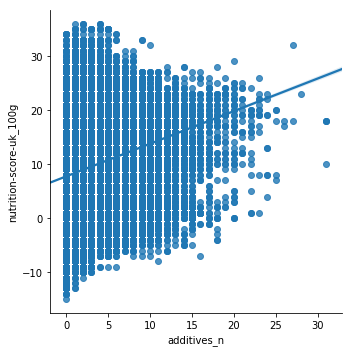

In [50]:
sns.lmplot(x="additives_n", y="nutrition-score-uk_100g", data=dataset)
plt.show()

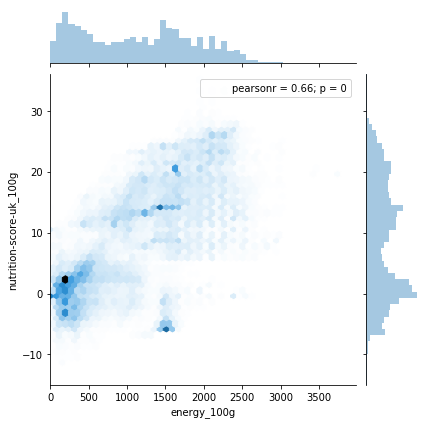

In [10]:
#sns.lmplot(x="energy_100g", y="nutrition-score-uk_100g", data=dataset)
sns.jointplot("energy_100g", "nutrition-score-uk_100g", data=dataset, kind="hex")
plt.show()

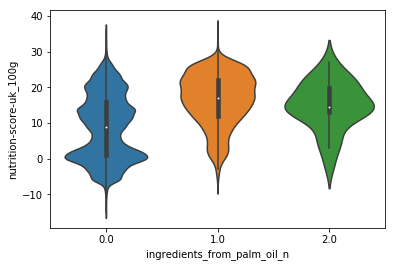

In [52]:
sns.violinplot(x="ingredients_from_palm_oil_n", y="nutrition-score-uk_100g", data=dataset)
plt.savefig("palm.png")
plt.show()

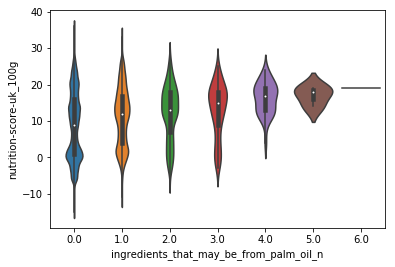

In [53]:
sns.violinplot(x="ingredients_that_may_be_from_palm_oil_n", y="nutrition-score-uk_100g", data=dataset)
plt.savefig("maybe_palm.png")
plt.show()

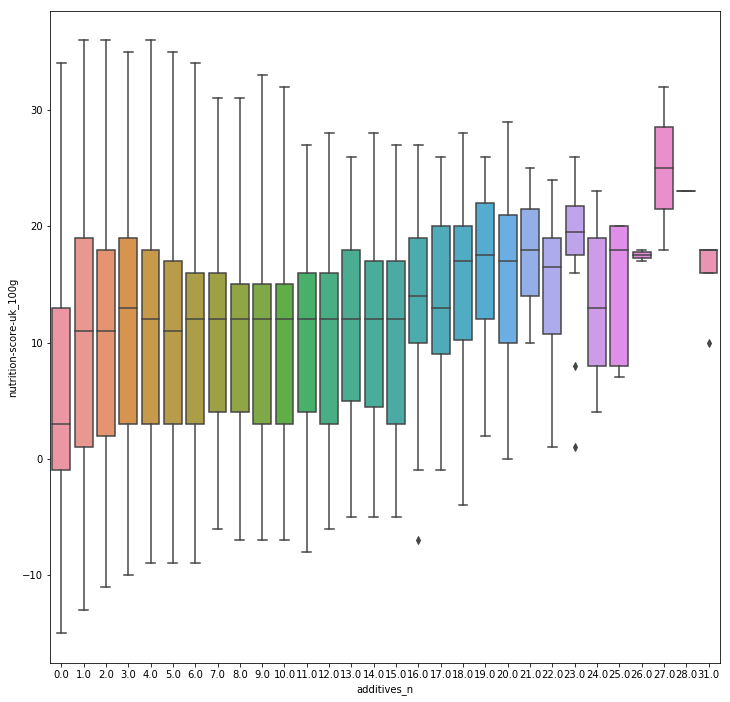

In [54]:
plt.figure(figsize=(12,12))
sns.boxplot(x="additives_n", y="nutrition-score-uk_100g", data=dataset) #violinplot
plt.savefig("score_additive.png")
plt.show()

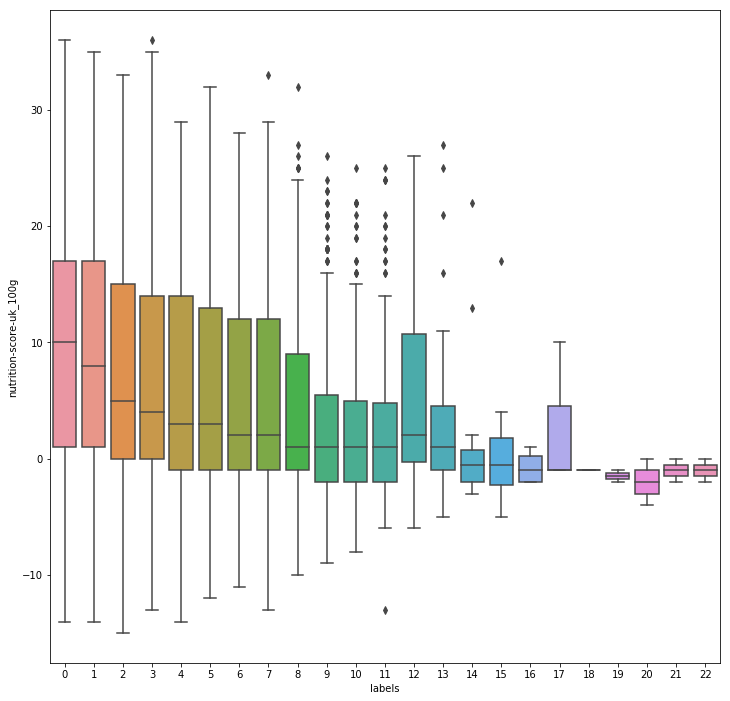

In [55]:
plt.figure(figsize=(12,12))
sns.boxplot(x="labels", y="nutrition-score-uk_100g", data=dataset)
plt.savefig("score_label.png")
plt.show()

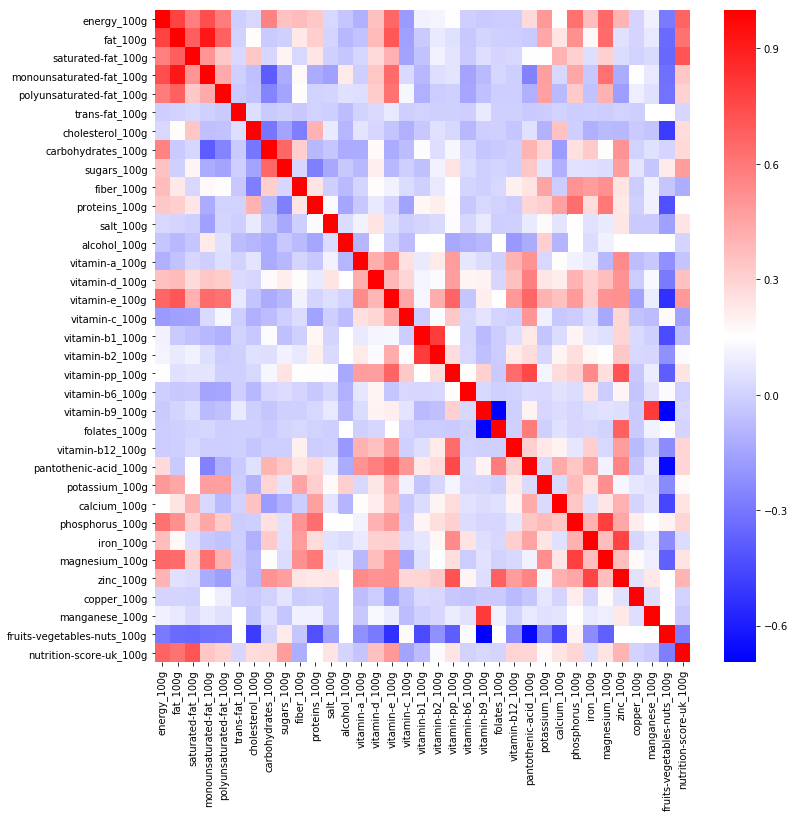

In [56]:
data = [x for x in dataset if x.endswith("_100g")]

plt.figure(figsize=(12,12))
correlation_matrix = dataset[data].corr()
# plt.imshow(correlation_matrix, cmap='hot',interpolation='nearest')
# plt.show()
sns.heatmap(correlation_matrix, cmap="bwr")
plt.savefig('cerrelation.png')
plt.show()

In [57]:
X, Y = "folates_100g", "vitamin-b9_100g"
print(len(dataset[dataset[X].notnull() & dataset[Y].notnull()]))

3


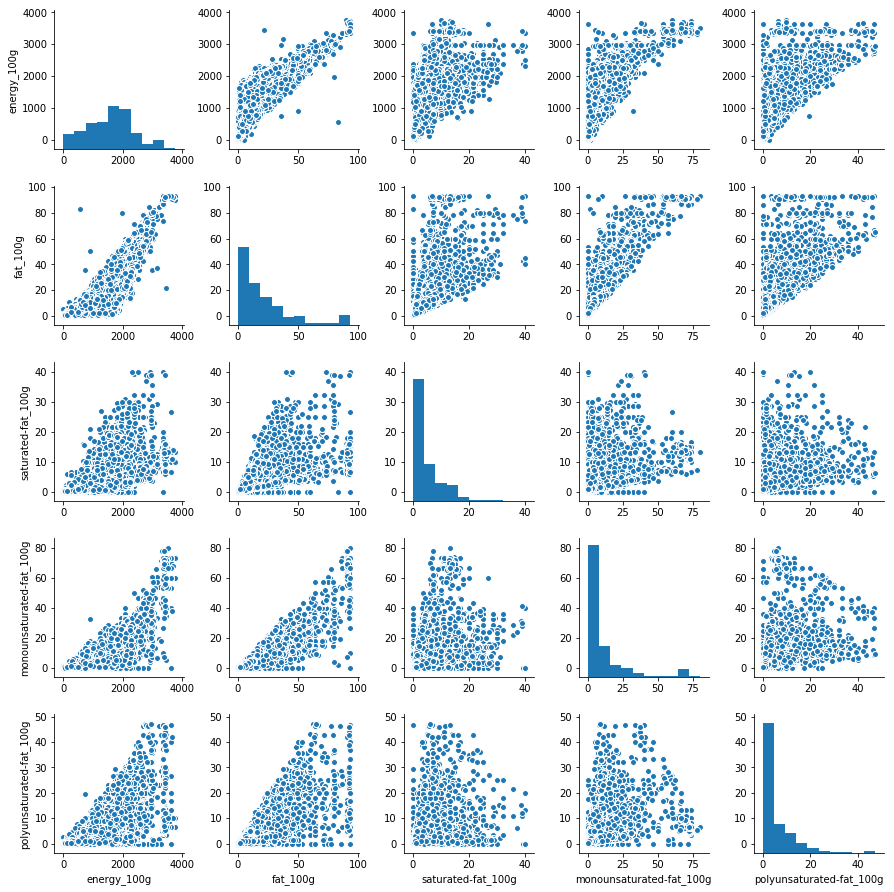

In [58]:
sns.pairplot(dataset[data[0:5]].dropna())
plt.savefig('fat-energy.png')
plt.show()

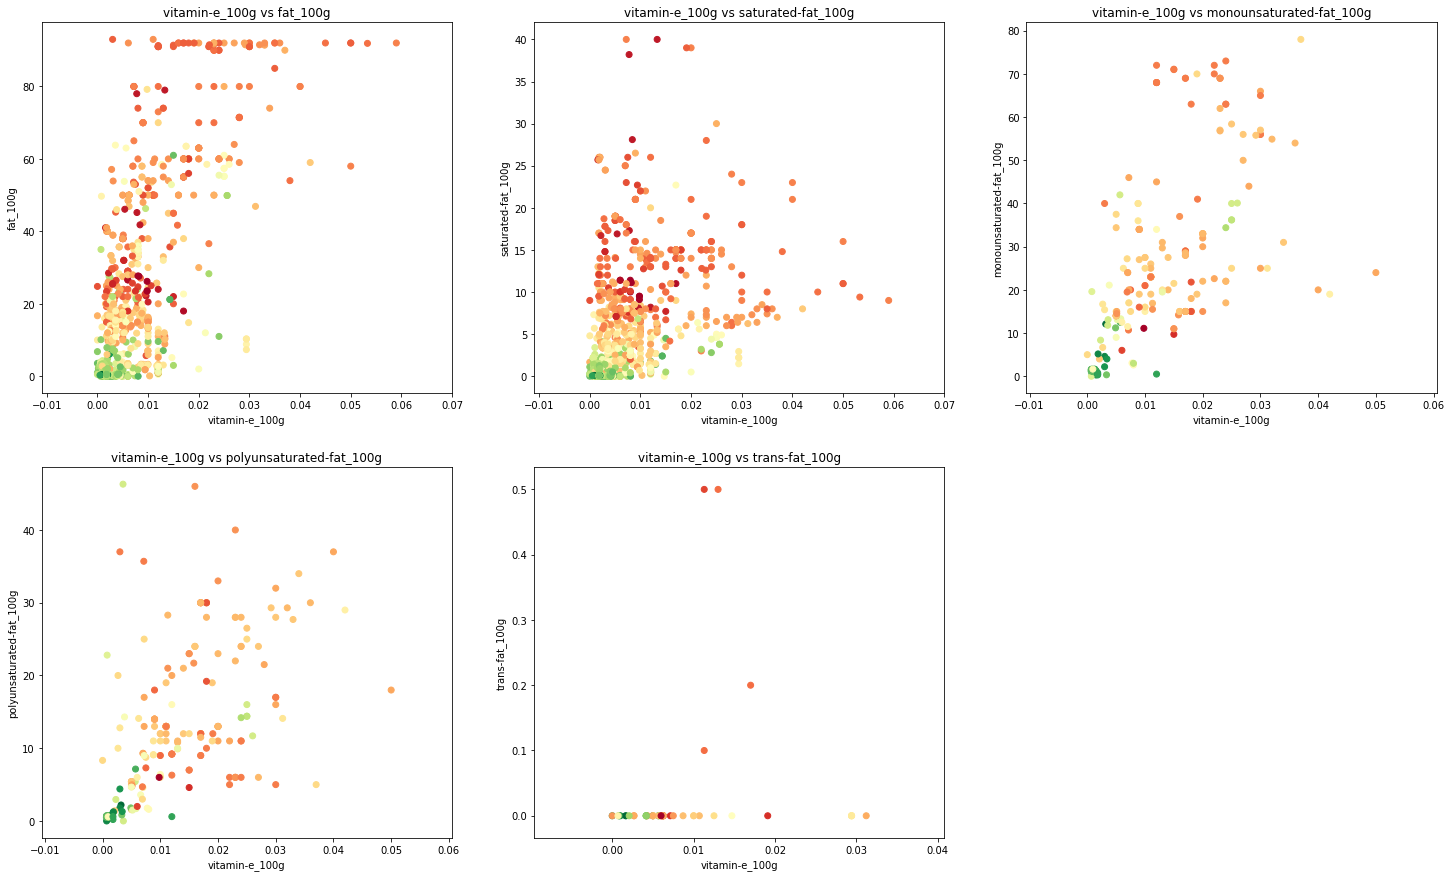

In [59]:
x = "vitamin-e_100g"
y_list = ["fat_100g", "saturated-fat_100g", "monounsaturated-fat_100g", "polyunsaturated-fat_100g", "trans-fat_100g"]

fig = plt.figure(figsize=(25,15))
for i, y in enumerate(y_list):
    plt.subplot(2, 3, i+1)
    plt.scatter(dataset[x], dataset[y], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
    plt.title("{} vs {}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
plt.savefig("vit-e_vs_fat.png")
plt.show()

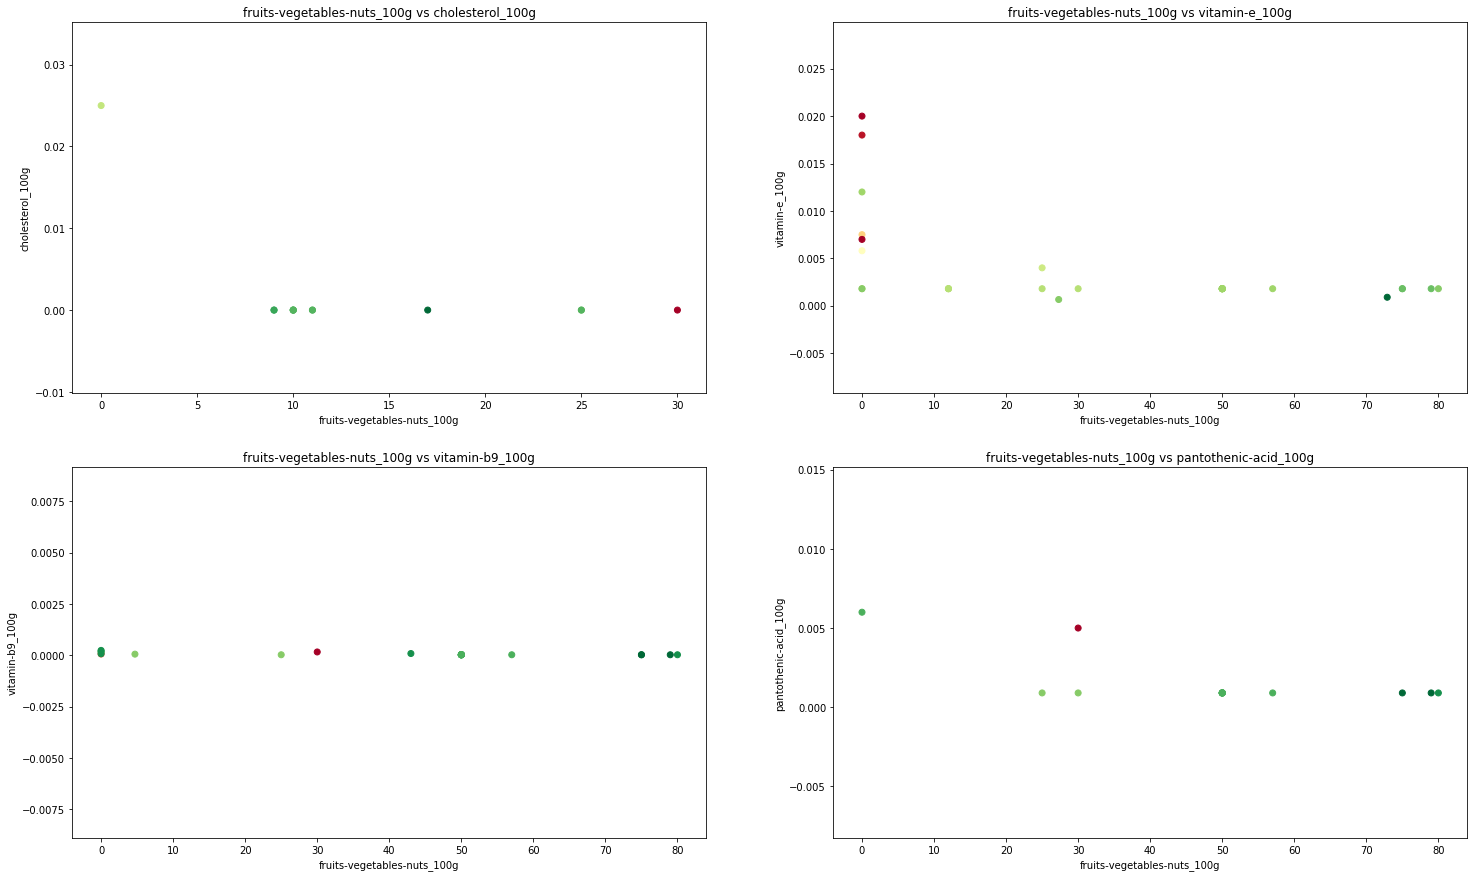

In [60]:
x = "fruits-vegetables-nuts_100g"
y_list = ["cholesterol_100g", "vitamin-e_100g", "vitamin-b9_100g", "pantothenic-acid_100g"]

fig = plt.figure(figsize=(25,15))
for i, y in enumerate(y_list):
    plt.subplot(2, 2, i+1)
    plt.scatter(dataset[x], dataset[y], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
    plt.title("{} vs {}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
plt.savefig("fruits.png")
plt.show()

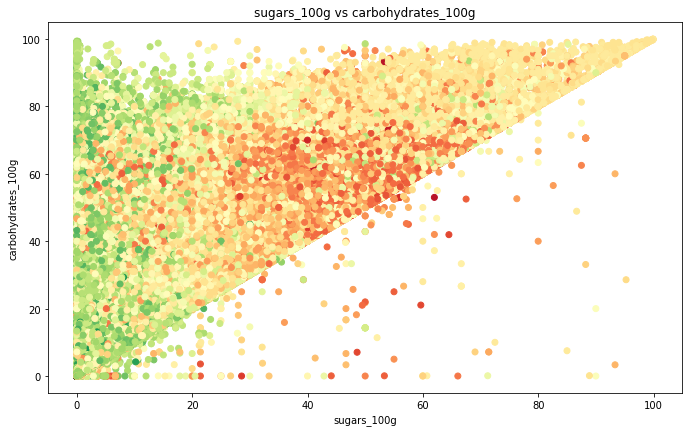

In [61]:
x = "sugars_100g"
y_list = ["carbohydrates_100g"]

fig = plt.figure(figsize=(25,15))
for i, y in enumerate(y_list):
    plt.subplot(2, 2, i+1)
    plt.scatter(dataset[x], dataset[y], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
    plt.title("{} vs {}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
plt.savefig("sucres.png")
plt.show()

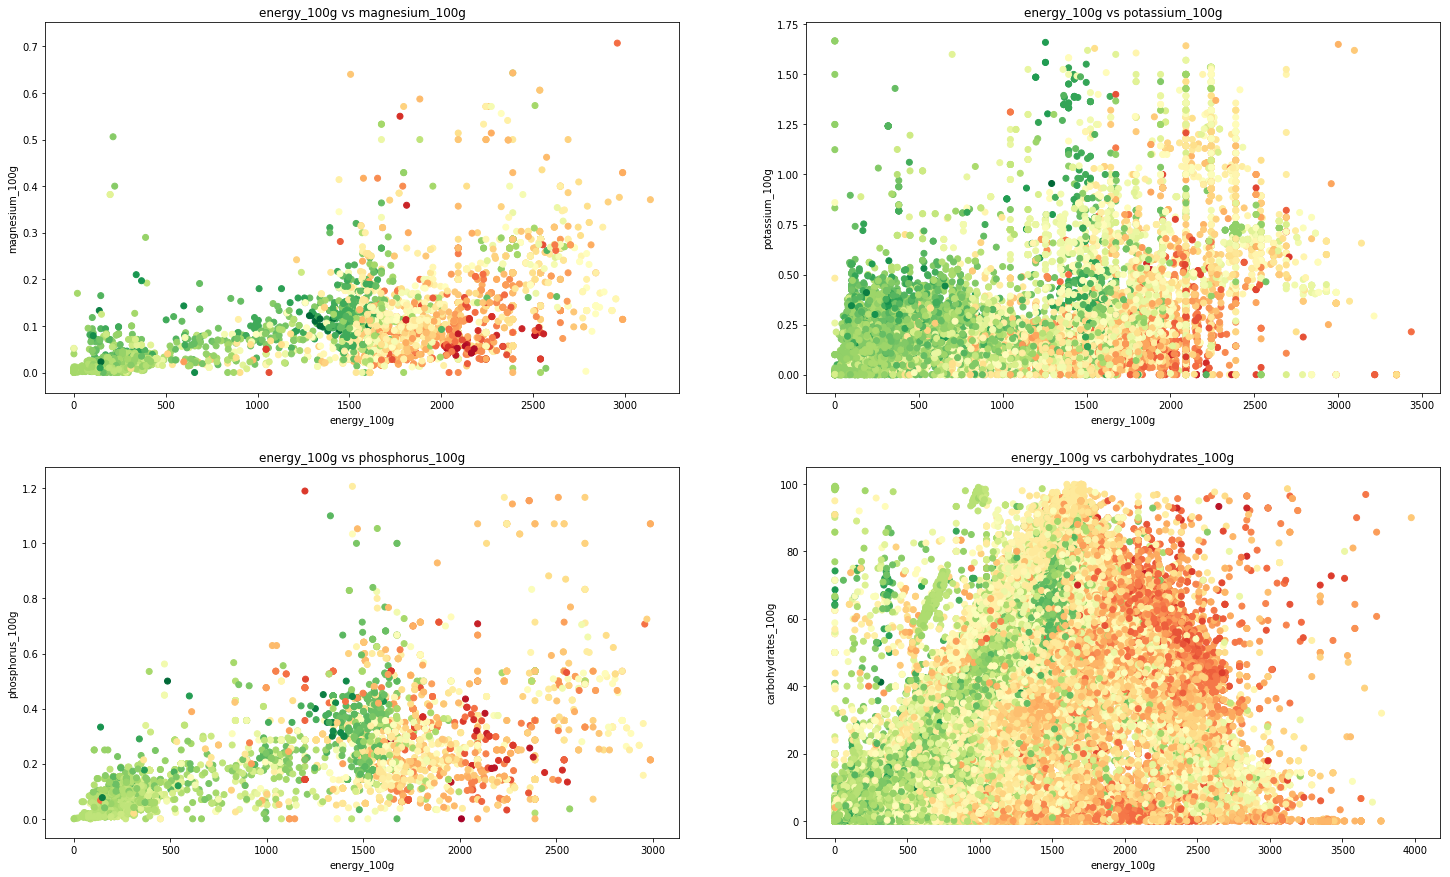

In [62]:
x = "energy_100g"
y_list = ["magnesium_100g", "potassium_100g", "phosphorus_100g", "carbohydrates_100g"]

fig = plt.figure(figsize=(25,15))
for i, y in enumerate(y_list):
    plt.subplot(2, 2, i+1)
    plt.scatter(dataset[x], dataset[y], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
    plt.title("{} vs {}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
plt.savefig("energy.png")
plt.show()

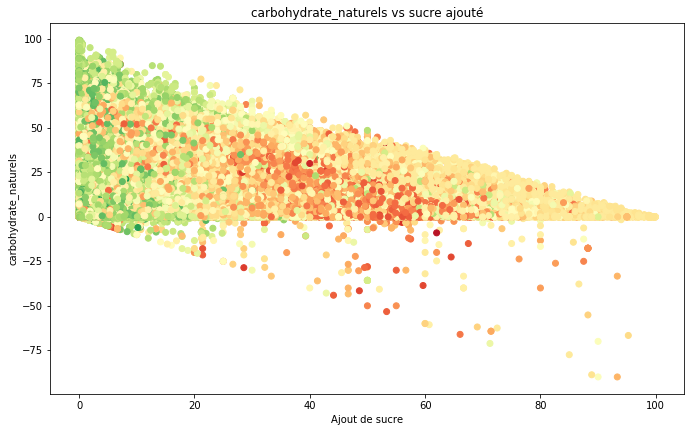

In [63]:
x = "sugars_100g"
y_list = ["carbohydrates_100g"]

fig = plt.figure(figsize=(25,15))
for i, y in enumerate(y_list):
    plt.subplot(2, 2, i+1)
    plt.scatter(dataset[x], dataset[y]-dataset[x], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
    plt.title("{} vs {}".format("carbohydrate_naturels", "sucre ajouté"))
    plt.xlabel("Ajout de sucre")
    plt.ylabel("carbohydrate_naturels")
plt.savefig("sucres_diff.png")
plt.show()

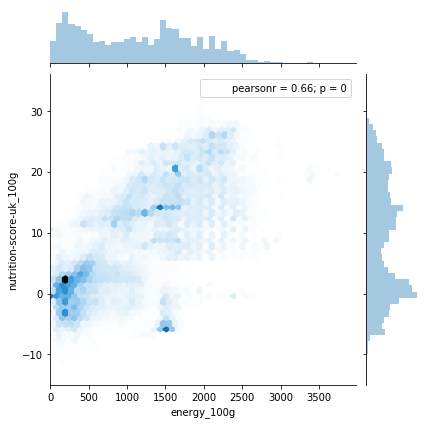

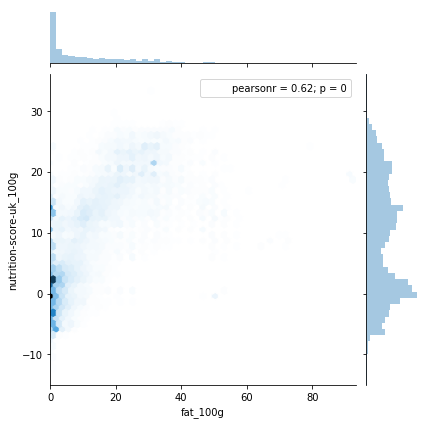

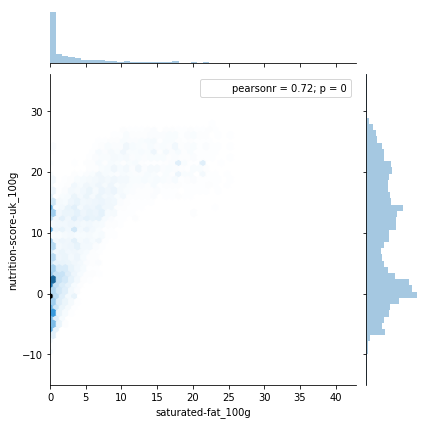

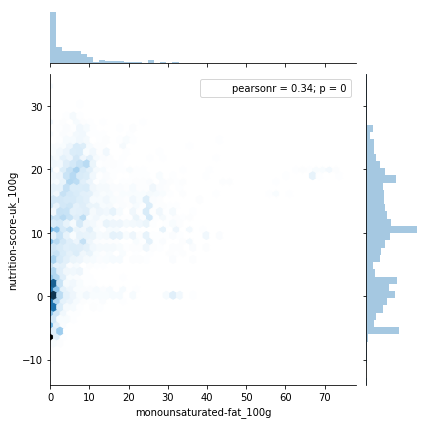

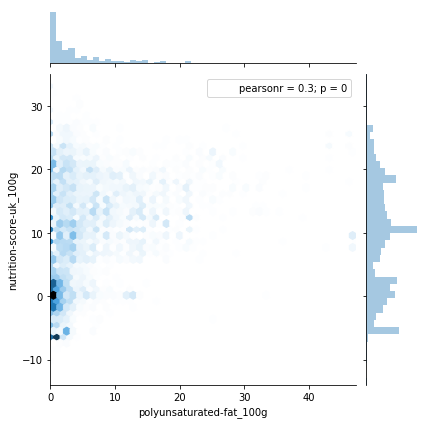

In [64]:
for i in range(5):
    plt.figure(figsize=(12,12))
#     plt.scatter(dataset[data[i]], dataset["nutrition-score-uk_100g"])
#     plt.title("{} vs {}".format(data[i], "nutrition-score-uk_100g"))
#     plt.xlabel(data[i])
#     plt.ylabel("nutrition-score-uk_100g")
    sns.jointplot(data[i], "nutrition-score-uk_100g", data=dataset, kind="hex")
    plt.savefig('{} vs {}.png'.format(data[i], "nutrition-score-uk_100g"))
    plt.savefig("score_energy.png")
    plt.show()

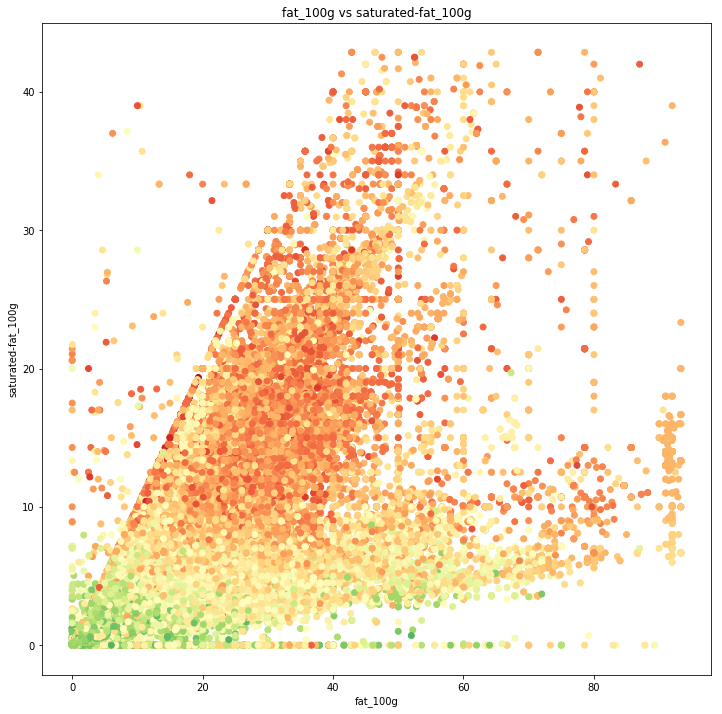

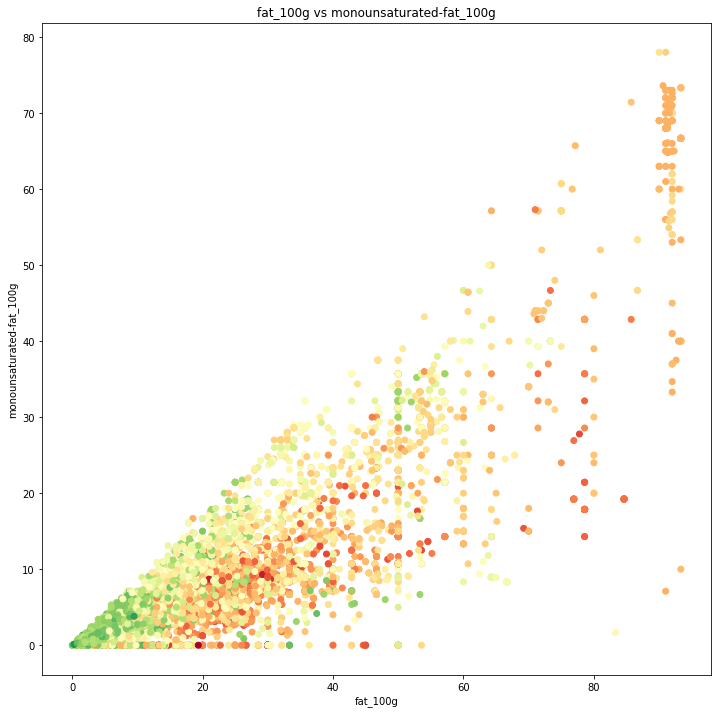

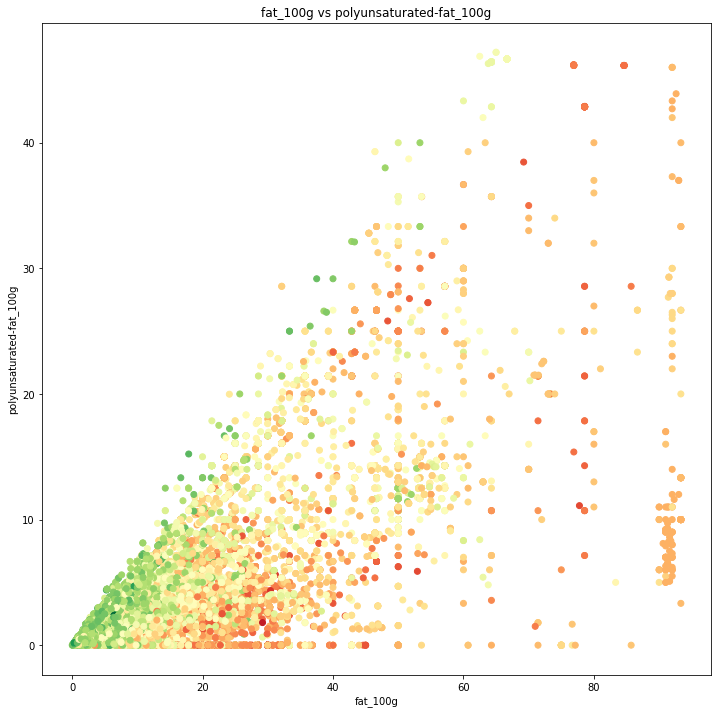

In [65]:
x = "fat_100g"
y_list = ["saturated-fat_100g", "monounsaturated-fat_100g", "polyunsaturated-fat_100g"]

for y in y_list:
    fig = plt.figure(figsize=(12,12))
    plt.scatter(dataset[x], dataset[y], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
    plt.title("{} vs {}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

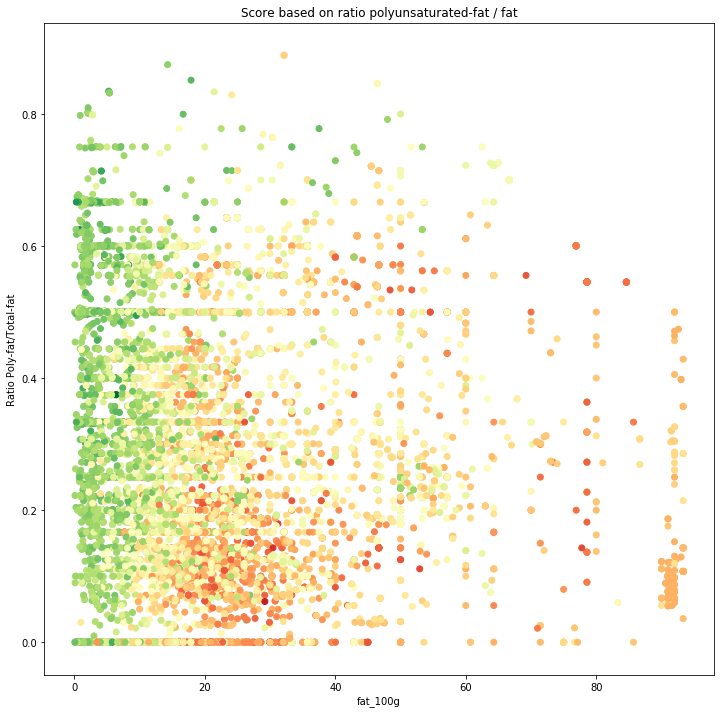

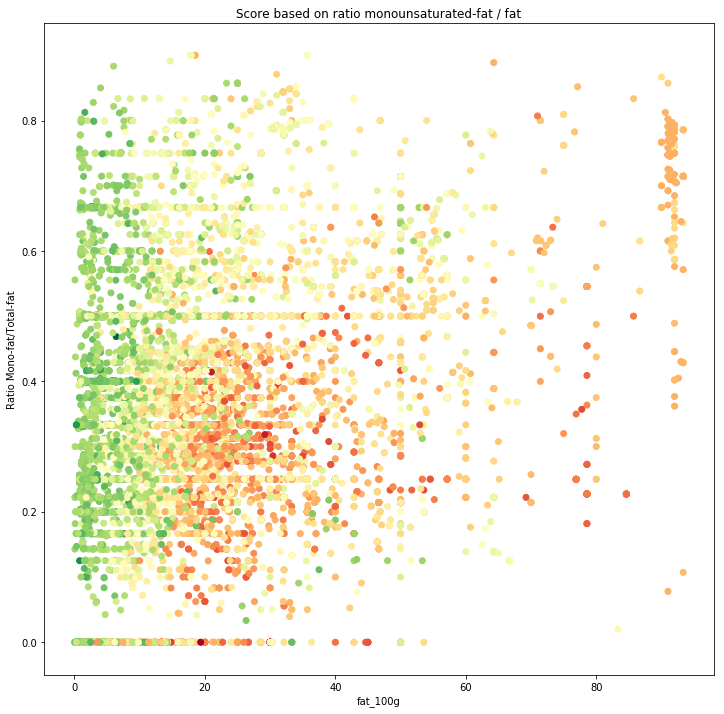

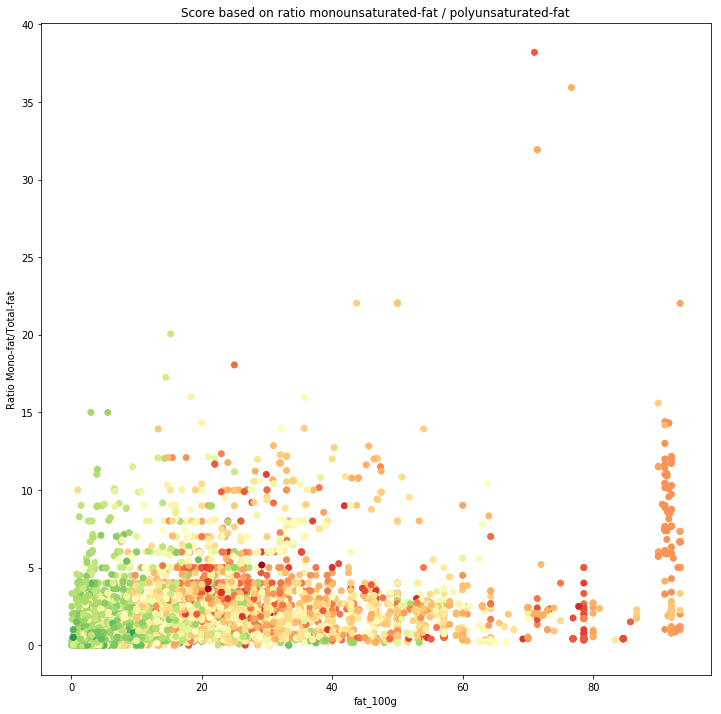

In [66]:
ratio_poly_fat = dataset["polyunsaturated-fat_100g"]/dataset["fat_100g"]
ratio_mono_fat = dataset["monounsaturated-fat_100g"]/dataset["fat_100g"]
ratio_mono_poly = dataset["monounsaturated-fat_100g"]/dataset["polyunsaturated-fat_100g"]

fig = plt.figure(figsize=(12,12))
plt.scatter(dataset["fat_100g"], ratio_poly_fat, c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
plt.title("Score based on ratio {} / {}".format("polyunsaturated-fat", "fat"))
plt.xlabel("fat_100g")
plt.ylabel("Ratio Poly-fat/Total-fat")
plt.savefig("{}_{}".format("polyunsaturated-fat", "fat"))
plt.show()

fig = plt.figure(figsize=(12,12))
plt.scatter(dataset["fat_100g"], ratio_mono_fat, c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
plt.title("Score based on ratio {} / {}".format("monounsaturated-fat", "fat"))
plt.xlabel("fat_100g")
plt.ylabel("Ratio Mono-fat/Total-fat")
plt.savefig("{}_{}".format("monounsaturated-fat", "fat"))
plt.show()

fig = plt.figure(figsize=(12,12))
plt.scatter(dataset["fat_100g"], ratio_mono_poly, c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
plt.title("Score based on ratio {} / {}".format("monounsaturated-fat", "polyunsaturated-fat"))
plt.xlabel("fat_100g")
plt.ylabel("Ratio Mono-fat/Total-fat")
plt.savefig("{}_{}".format("monounsaturated-fat", "polyunsaturated-fat"))
plt.show()

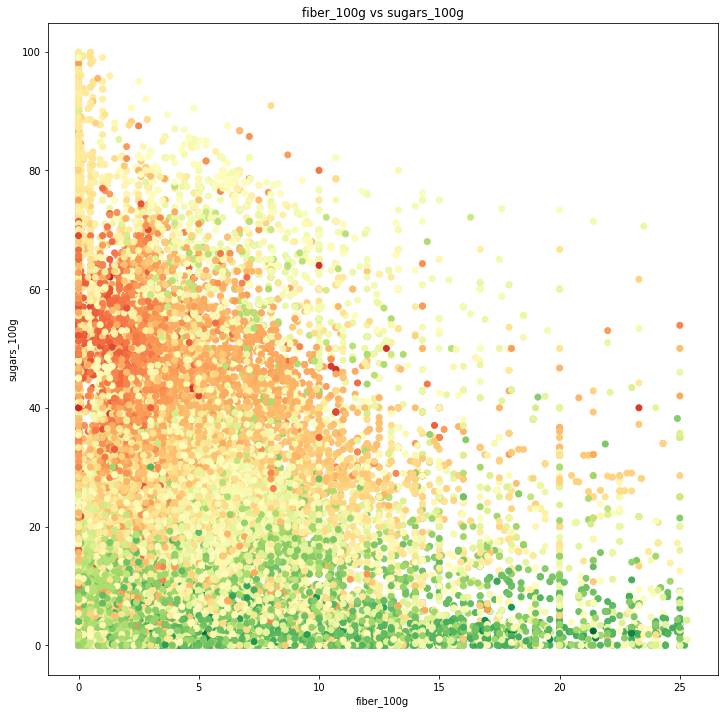

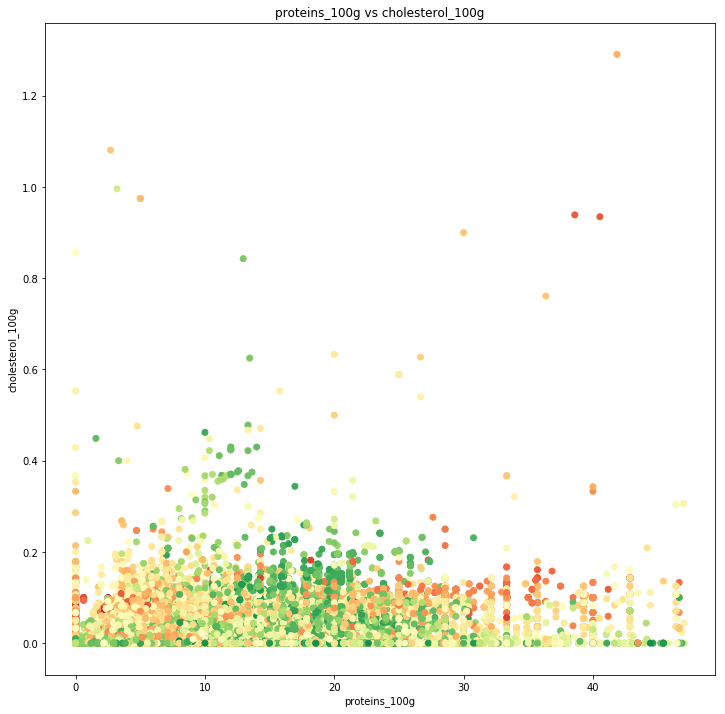

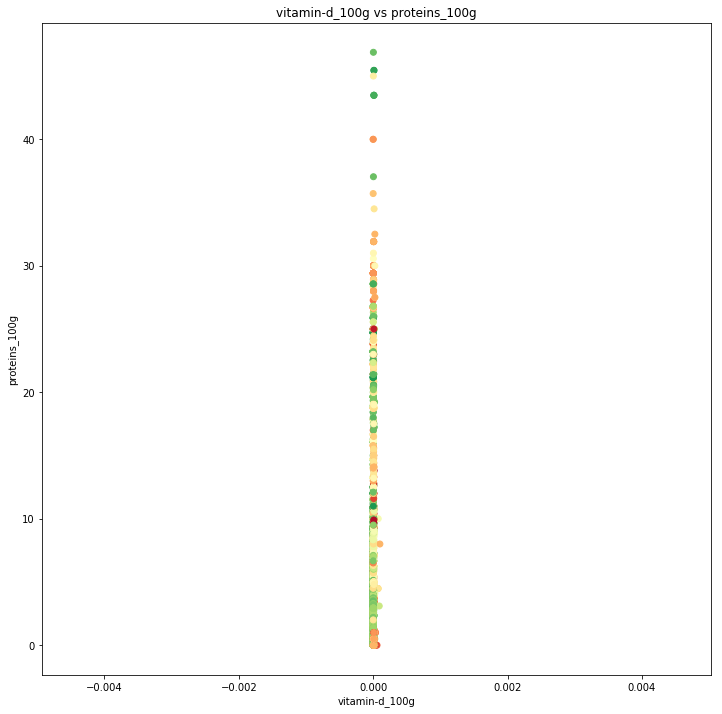

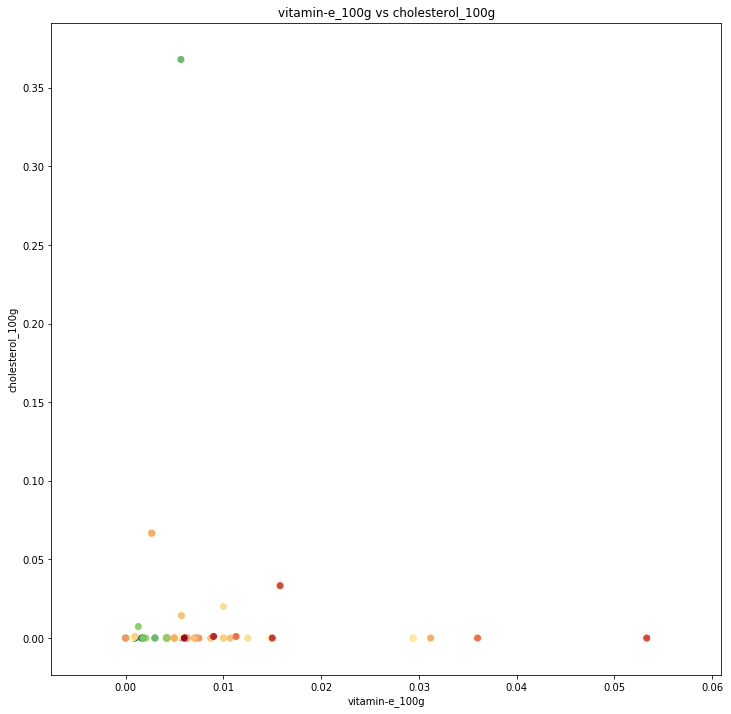

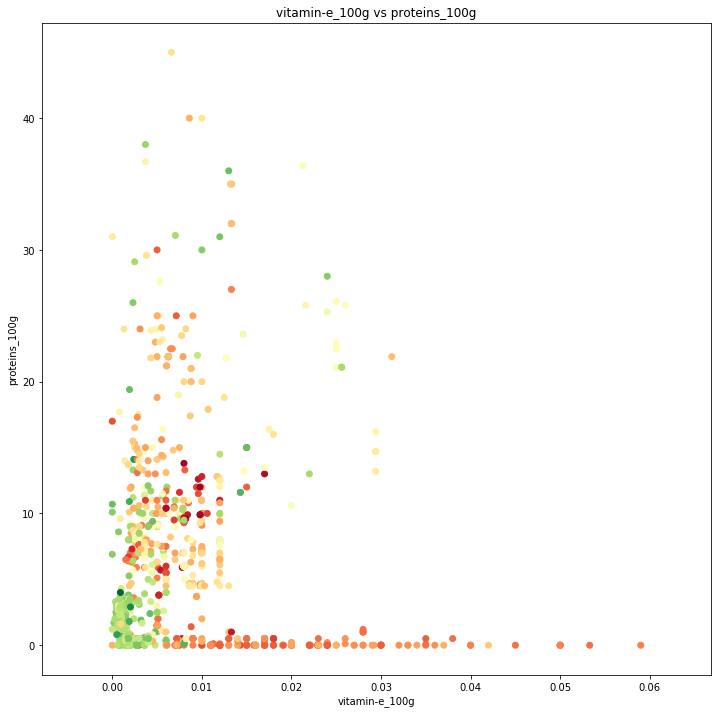

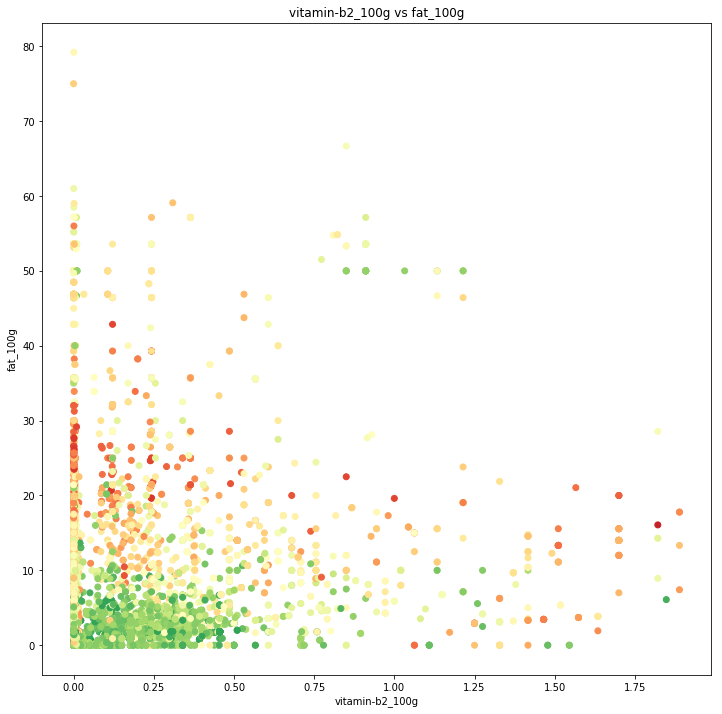

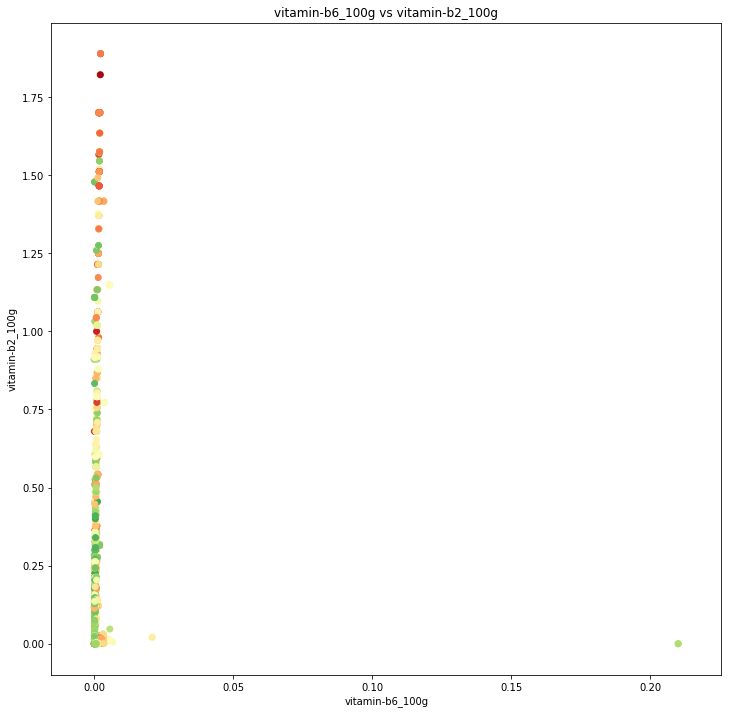

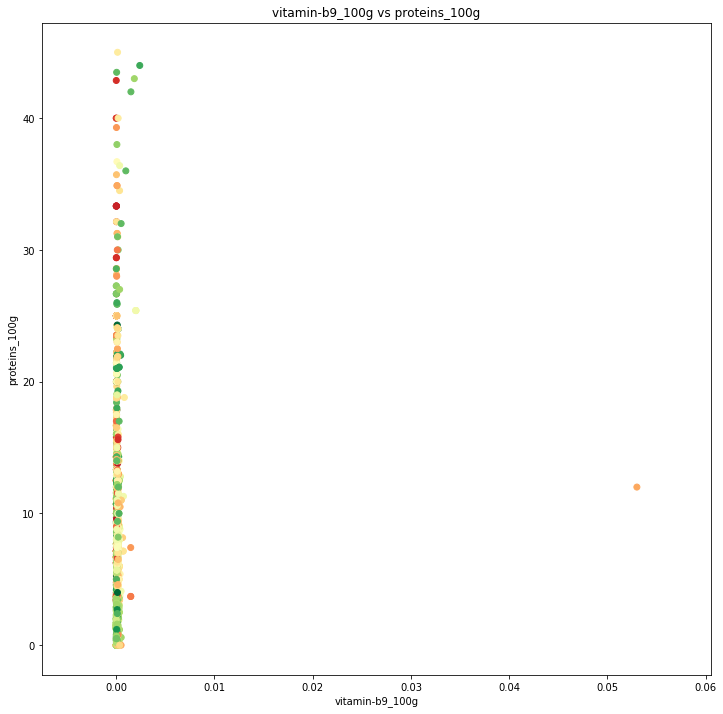

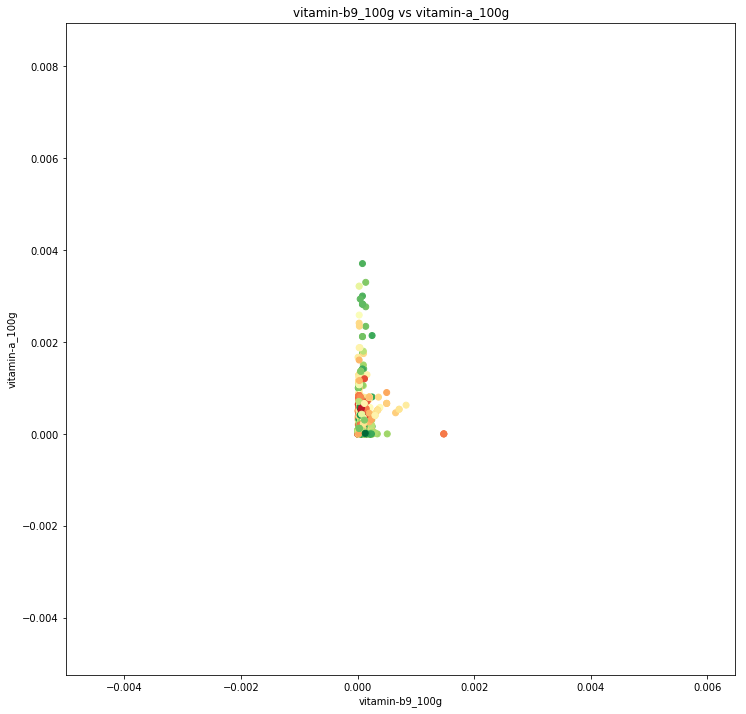

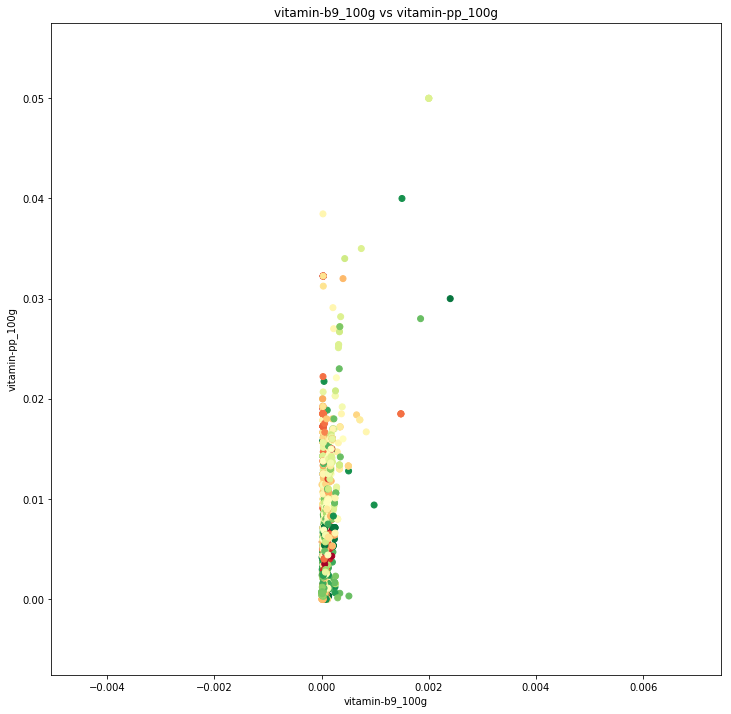

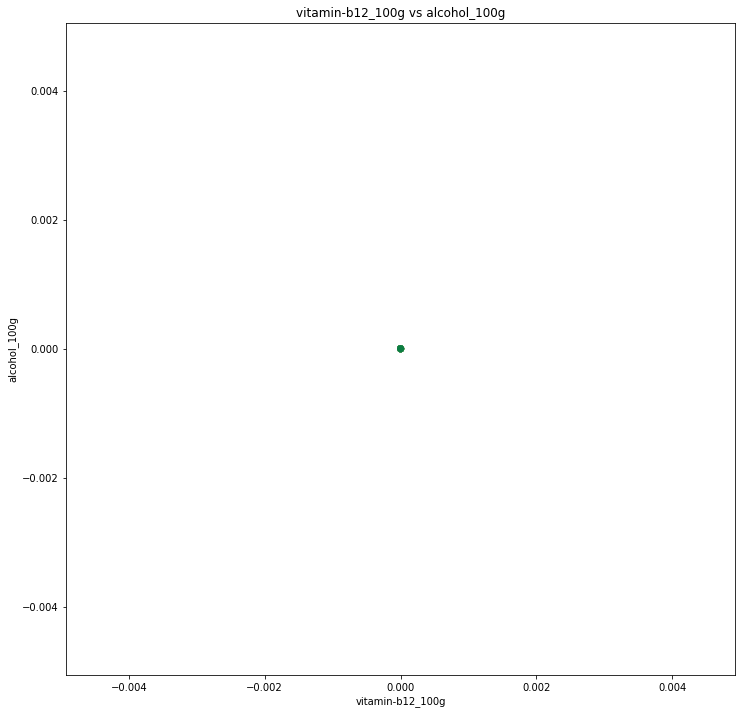

In [67]:
series = []
c_m = correlation_matrix.as_matrix()
for line in range(1, correlation_matrix.shape[0]):
    for col in range(line):
        if c_m[line, col] > 0.6:
            if dataset.columns[line].endswith("_100g") and dataset.columns[col].endswith("_100g"):
                x, y = dataset.columns[line], dataset.columns[col]
                fig = plt.figure(figsize=(12,12))
                plt.scatter(dataset[x], dataset[y], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')
                plt.title("{} vs {}".format(x, y))
                plt.xlabel(x)
                plt.ylabel(y)
                plt.show()

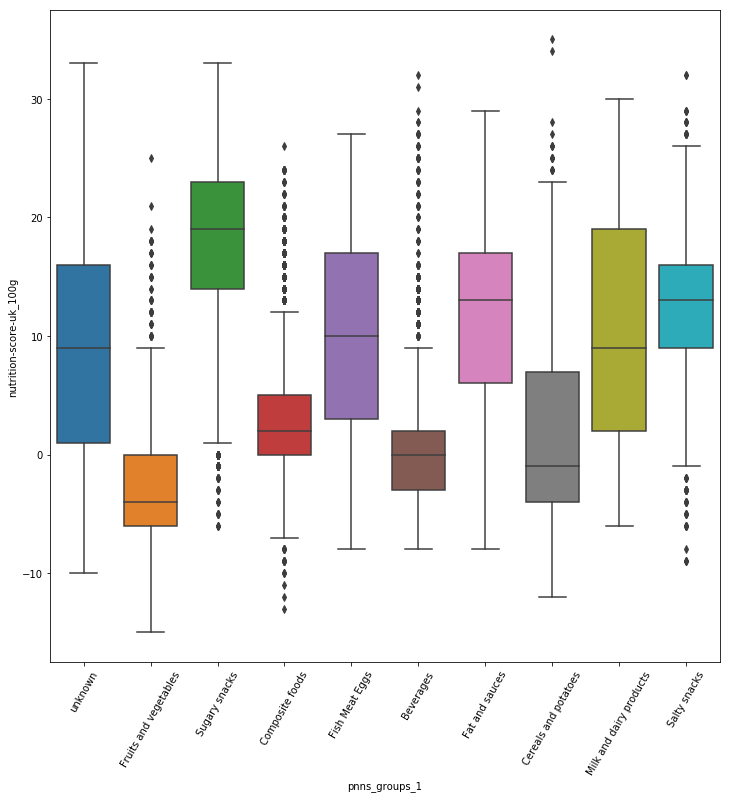

In [68]:
plt.figure(figsize=(12,12))
g = sns.boxplot(x="pnns_groups_1", y="nutrition-score-uk_100g", data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=60)
plt.savefig("score_per_group1.png")
plt.show()

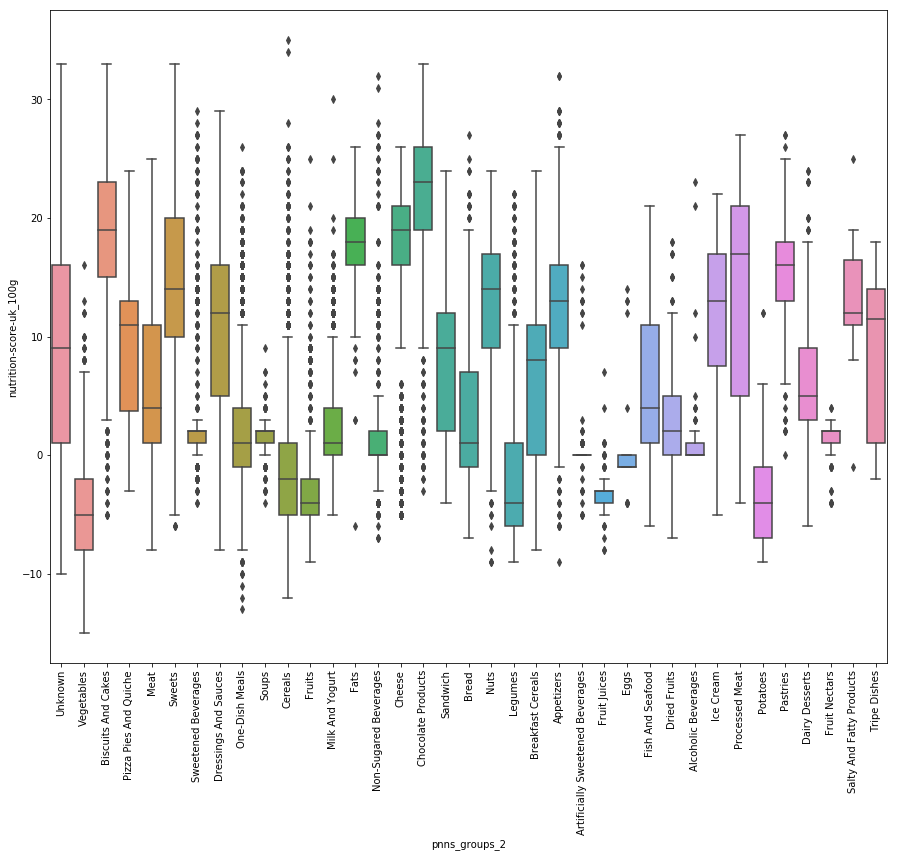

In [69]:
plt.figure(figsize=(15,12))
g = sns.boxplot(x="pnns_groups_2", y="nutrition-score-uk_100g", data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.savefig("score_per_group2.png")
plt.show()

In [70]:
dataset = dataset[(dataset["vitamin-b1_100g"] < 0.05) | (dataset["vitamin-b1_100g"].isnull())]
dataset = dataset[(dataset["vitamin-d_100g"] < 0.001) | (dataset["vitamin-b1_100g"].isnull())]

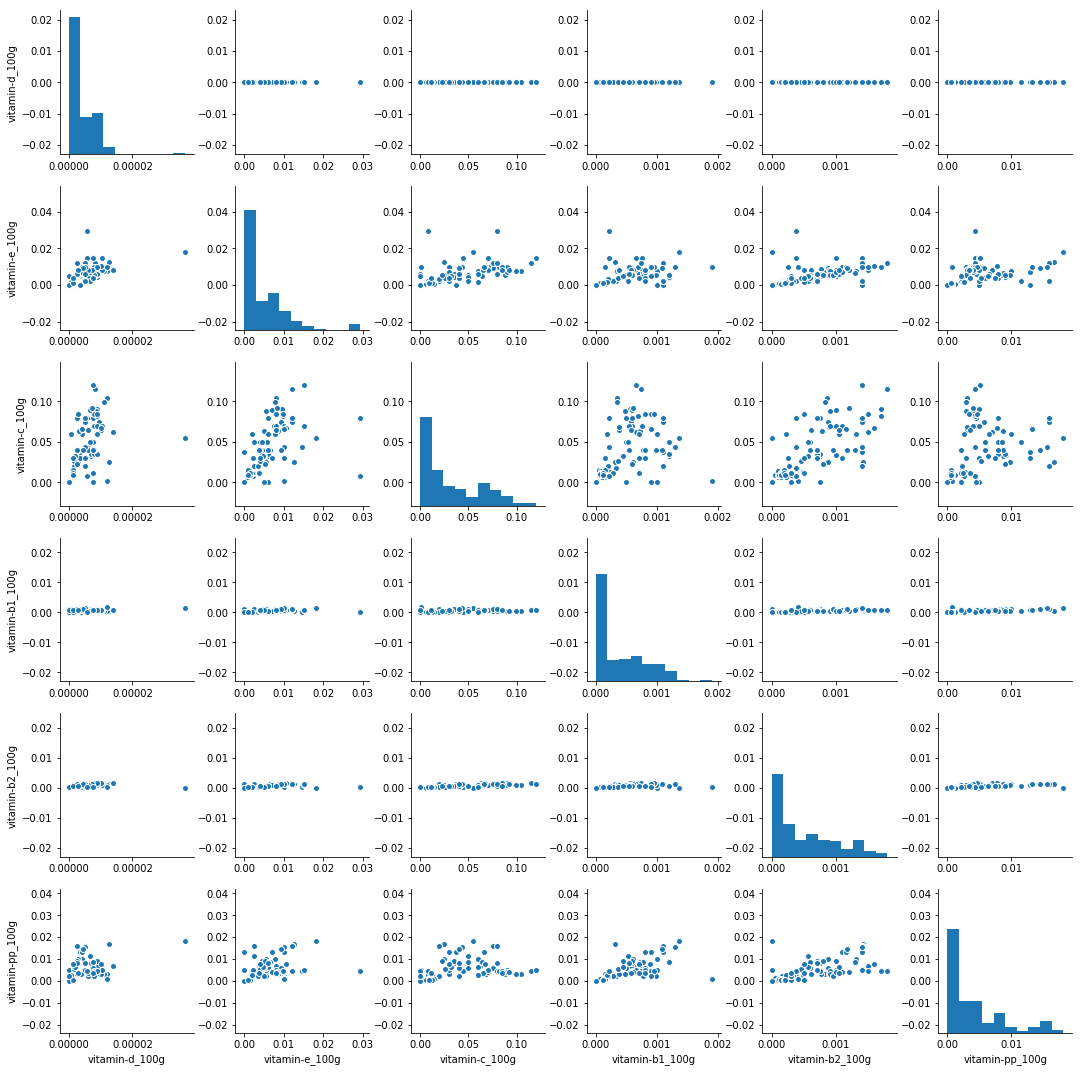

In [71]:
g = sns.pairplot(dataset[data[14:20]].dropna())

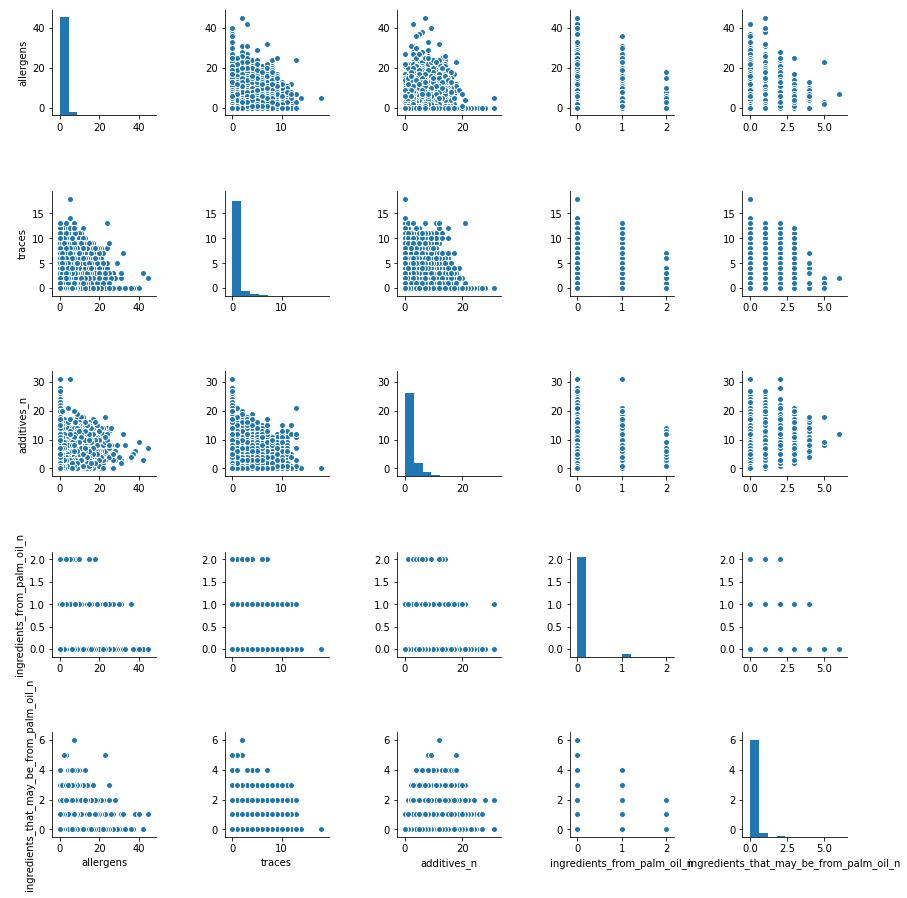

In [72]:
g = sns.pairplot(dataset[dataset.columns[1:7]].dropna())

### Reduction Dimensionnelle

In [26]:
from collections import defaultdict, Counter
from sklearn import preprocessing

d = defaultdict(preprocessing.LabelEncoder)

for col in dataset:
    if dataset[col].dtype == "object":
        dataset[col] = d[col].fit_transform(dataset[col].fillna('0'))

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(dataset.drop("nutrition-score-uk_100g", axis=1).fillna('0').as_matrix())

C:\Anaconda501\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


C:\Anaconda501\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


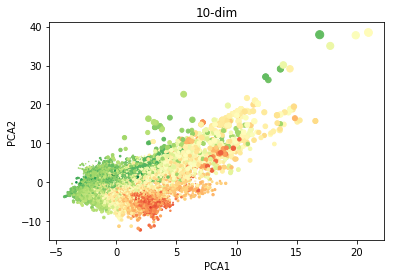

[ 0.09027206  0.06989578  0.05953775  0.04971893  0.043086    0.03745518
  0.03108661  0.03048371  0.02600831  0.02411207]
[ 0.09027206  0.16016784  0.21970559  0.26942452  0.31251051  0.3499657
  0.38105231  0.41153602  0.43754433  0.4616564 ]


In [46]:
from sklearn.decomposition import PCA

n_comp = 10
pca = PCA(n_components=n_comp)
# X_proj = pca.fit_transform(dataset.drop("nutrition-score-uk_100g", axis=1).fillna('0'))
X_proj = pca.fit_transform(X)

plt.scatter(X_proj[:, 0], X_proj[:, 1], s=X_proj[:, 2], c=dataset["nutrition-score-uk_100g"], cmap='RdYlGn_r')

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("{}-dim".format(n_comp))
#plt.savefig("{}-points".format(sample_size), dpi=600)
plt.show()

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
print(pca.)

##  Analyse Composition

In [28]:
# def test(x):
#     if x<5:
#         return 1  
#     else:
#         return 0
# dataset["good"] = dataset["nutrition-score-uk_100g"].apply(lambda x : test(x))

In [24]:
quantiles = dataset["nutrition-score-uk_100g"].quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
print(quantiles)

{0.25: 1.0, 0.5: 9.0, 0.75: 16.0}


In [25]:
def score(x):
    if x <= quantiles[0.25]:
        return "very good"
    elif x <= quantiles[0.50]:
        return "good"
    elif x <= quantiles[0.75]: 
        return "bad"
    else:
        return "very bad"

In [26]:
dataset["good"] = dataset["nutrition-score-uk_100g"].apply(score)

In [27]:
df = dataset.groupby("good").mean()

In [28]:
df

labels  allergens    traces  additives_n  \
good                                                    
bad        0.326337   0.390277  0.262222     2.550469   
good       0.472441   0.465123  0.299491     2.013090   
very bad   0.330377   0.382432  0.232013     2.129534   
very good  0.650971   0.254688  0.225956     1.259401   

           ingredients_from_palm_oil_n  \
good                                     
bad                           0.026230   
good                          0.013603   
very bad                      0.031828   
very good                     0.003109   

           ingredients_that_may_be_from_palm_oil_n  energy_100g   fat_100g  \
good                                                                         
bad                                       0.081855  1419.391803  15.697706   
good                                      0.061398   843.705787   7.811581   
very bad                                  0.060170  1387.872328  18.627124   
very good                                 0.027478   603.519847   3.011015   

           saturated-fat_100g  monounsaturated-fat_100g  \
good                                                      
bad                  4.379644                 10.535571   
good                 1.633181                  5.777435   
very bad            12.175417                 18.431073   
very good            0.521156                  2.254615   

                    ...             potassium_100g  calcium_100g  \
good                ...                                            
bad                 ...                   0.415149      0.075034   
good                ...                   0.300999      0.062984   
very bad            ...                   0.218147      0.147351   
very good           ...                   0.213489      0.054501   

           phosphorus_100g  iron_100g  magnesium_100g  zinc_100g  copper_100g  \
good                                                                            
bad               0.314347   0.001896        0.137339   0.005794     0.000980   
good              0.236111   0.001469        0.108198   0.003664     0.002276   
very bad          0.212811   0.001548        0.058096   0.004108     0.000508   
very good         0.163316   0.001385        0.066022   0.001870     0.000279   

           manganese_100g  fruits-vegetables-nuts_100g  \
good                                                     
bad              0.001466                    27.439351   
good             0.001472                    23.339942   
very bad         0.001458                    22.411801   
very good        0.001429                    33.304469   

           nutrition-score-uk_100g  
good                                
bad                      12.993225  
good                      4.903672  
very bad                 21.221313  
very good                -1.794366  

[4 rows x 41 columns]

In [58]:
plotlist = ["fat_100g", "saturated-fat_100g", "saturated-fat_100g", "monounsaturated-fat_100g", "polyunsaturated-fat_100g", "trans-fat_100g", "cholesterol_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "energy_100g"]

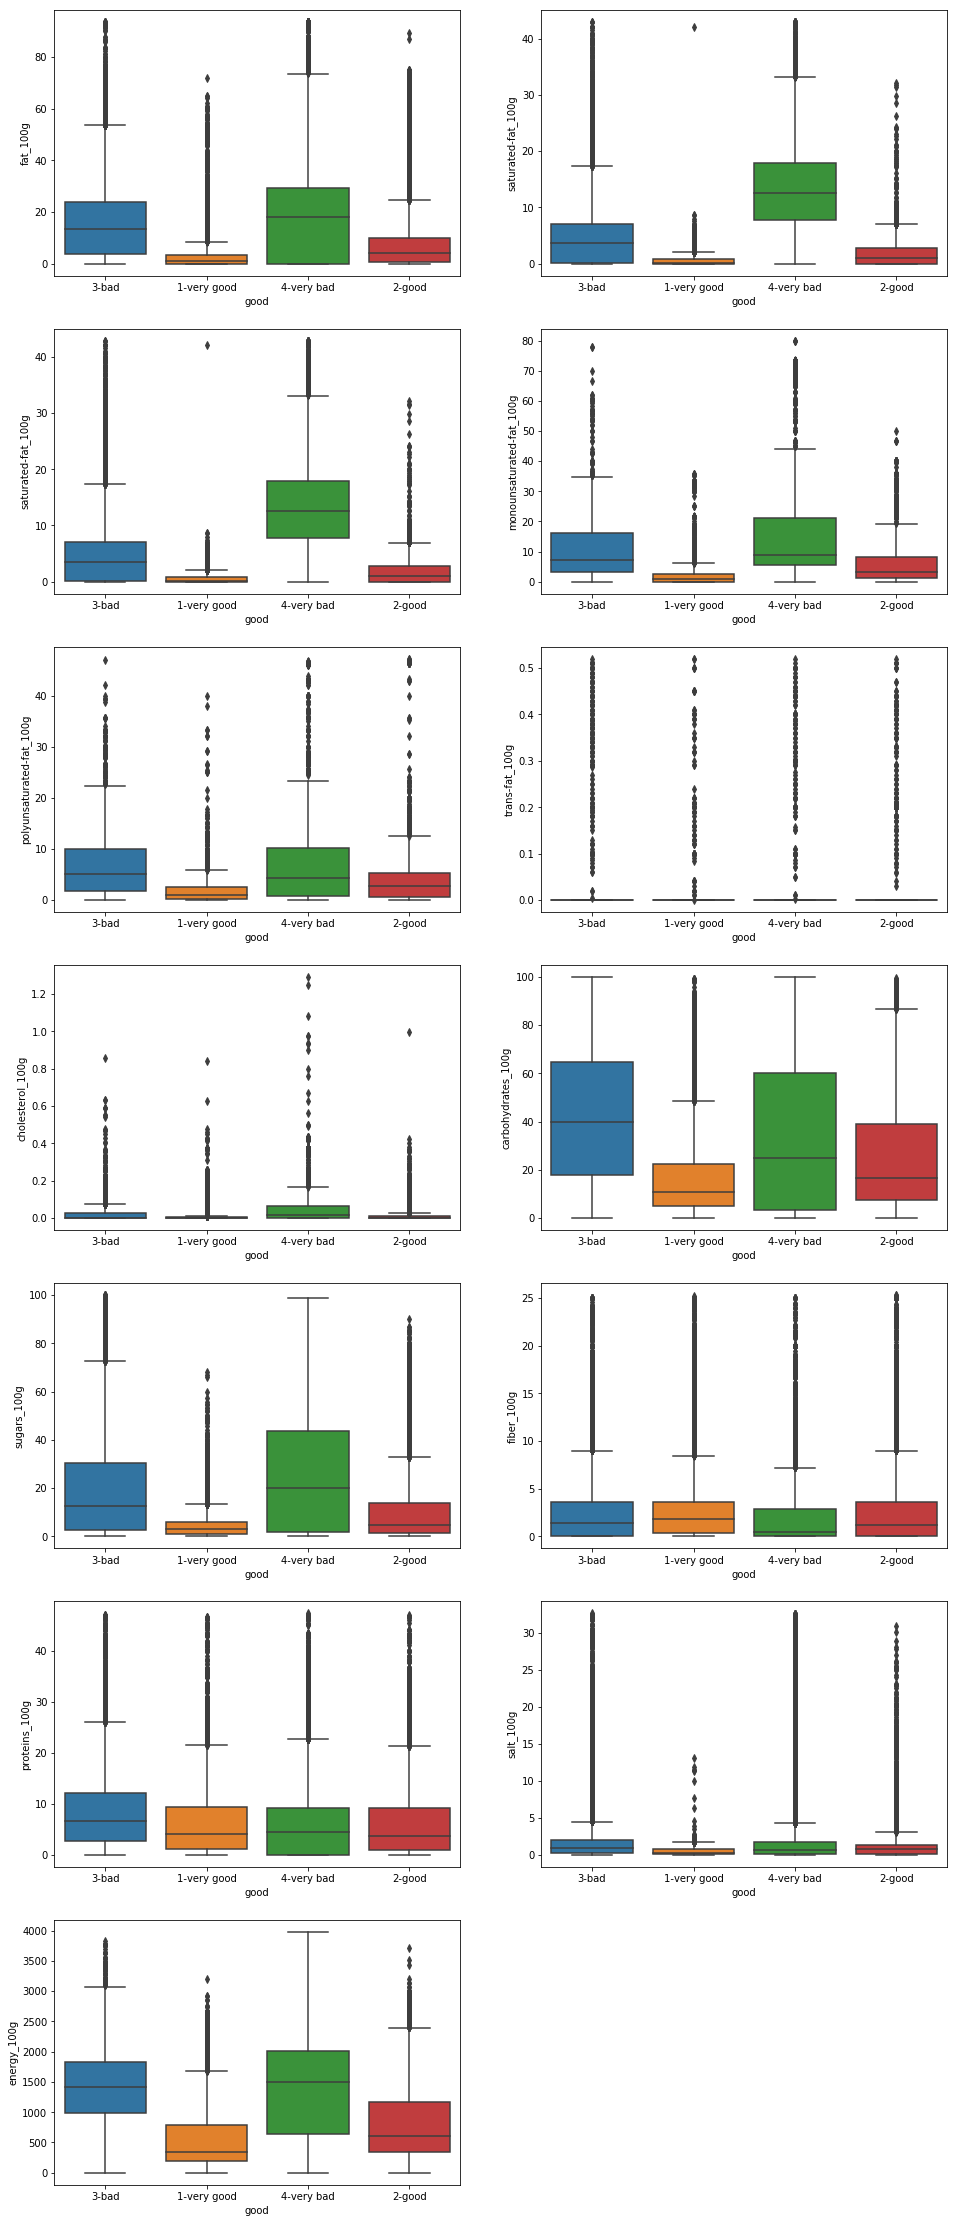

In [59]:
plt.figure(figsize=(16,40))
for i, each in enumerate(plotlist):
    plt.subplot(7, 2, i+1)
    sns.boxplot(y=each, x="good", data=dataset)
plt.show()

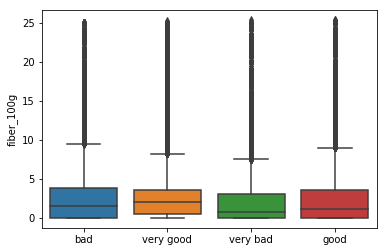

In [31]:
sns.boxplot(y="fiber_100g", x="good", data=dataset)
plt.xlabel("")
plt.savefig("fibre.png")
plt.show()